# SI Plots
* Code to load in CYGNUS limit data for spin-independent WIMP-proton cross section
* Also loads in neutrino floor for xenon and fluorine
* Also loads in current limits (2018) on the cross section

## First load in data

In [3]:
from numpy import *
import matplotlib.pyplot as plt
import matplotlib.cm as cm

froot = "../data/CYGNUS1000-EnergyOn-"
ftit = "CYGNUS-1000 for 3 years"
fname = ["" for x in range(0,5)]
fname[0] ="Ideal"
fname[1] ="Pixel"
fname[2] ="Predrift"
fname[3] ="Postdrift"
#fname[4] ="Strip"
#fname[5] ="Optical"
#fname[6] ="Wire"
#fname[7] ="Pad"
#fname[8] ="Planar"
fname[4] ="Nondirectional"

data_all = zeros(shape=(10,50))
for i in range(0,5):
    data = loadtxt(froot+fname[i]+".txt")
    m,F,He = data[0,:], data[1,:], data[2,:]
    He[He==0] = 1
    F[F==0] = 1 # set all zeros to large number so minimum() can find interpolate between He and F
    data_all[i,:] = minimum(He,F)  


## Then plot

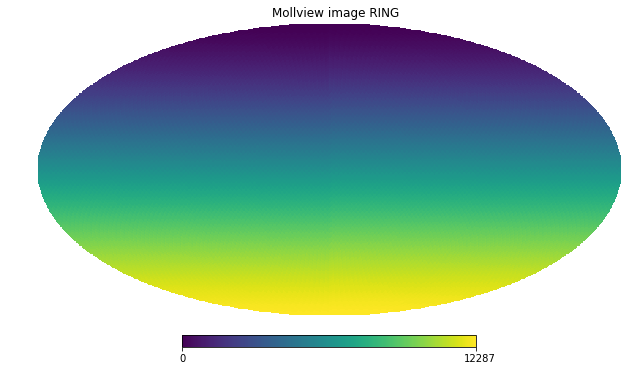

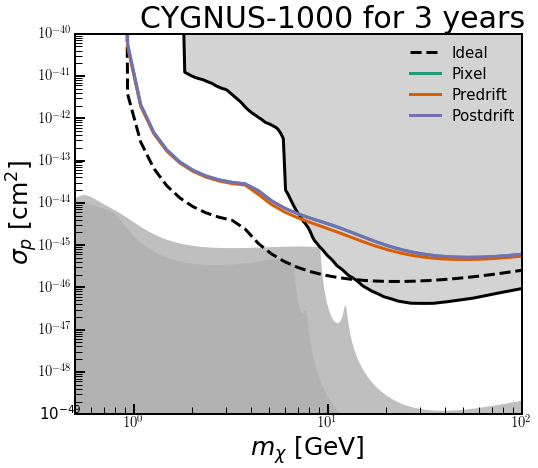

In [4]:
# 2018 Current limits
data = loadtxt("../data/SIlimits_2018.txt",delimiter=',')
mlim,slim = data[0,:],data[1,:]

# Xe and F neutrino floors
data = loadtxt("../data/nufloor_Xe.txt",delimiter=',')
m2,nu_Xe = data[0,:],data[1,:]
data = loadtxt("../data/nufloor_F.txt",delimiter=',')
m3,nu_F = data[0,:],data[1,:]

# Plot
plt.rcParams['axes.linewidth'] = 2
fig = plt.figure(figsize=(8,7))
ax = fig.add_subplot(111)
col = cm.Dark2(linspace(0,1,10))
col[0,:] = [0,0,0,1]
col[-1,:] = [0,0,0,1]
# Close-up range
xmin = 0.5
xmax = 1.0e2
ymax = 1.0e-40
ymin = 1.0e-49

# Full range
#xmin = 0.1
#xmax = 1.0e3
#ymax = 1.0e-40
#ymin = 1.0e-50

# Neutrino floor
plt.fill_between(m2, nu_Xe, y2=ymin,facecolor='Gray',alpha= 0.2)
plt.fill_between(m2, nu_F, y2=ymin,facecolor='Gray',alpha=0.5)

# Expt limits
plt.fill_between(mlim, slim, y2=ymax,facecolor='LightGray')
plt.loglog(mlim, slim,"-",linewidth=3,color='k')

# Plot lines
lsty = ["" for x in range(0,5)]
lsty[0] ="--"
lsty[1] ="-"
lsty[2] ="-"
lsty[3] ="-"
#lsty[4] ="-"
#lsty[5] ="-"
#lsty[6] ="-"
#lsty[7] ="-"
#lsty[8] ="-"
lsty[-1] ="--"
for i in range(0,4):
    plt.loglog(m,data_all[i,:],lsty[i],color=col[i,:],linewidth=3,label=fname[i])

# Labels
plt.legend(loc='upper right',fontsize=15,frameon=False)
plt.xlabel(r"$m_\chi$ [GeV]",fontsize=25)
plt.ylabel(r"$\sigma_p$ [cm$^2$]",fontsize=25)

# Limits
ax.set_xlim(left=xmin, right=xmax)
ax.set_ylim(bottom=ymin, top=ymax)


# Style
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
ax.tick_params(which='major',direction='in',width=2,length=10)
ax.tick_params(which='minor',direction='in',width=1,length=7)
plt.title(ftit,fontsize=30)
plt.show()
fig.savefig('../plots/Cygnus'+ftit+'-SI.pdf')


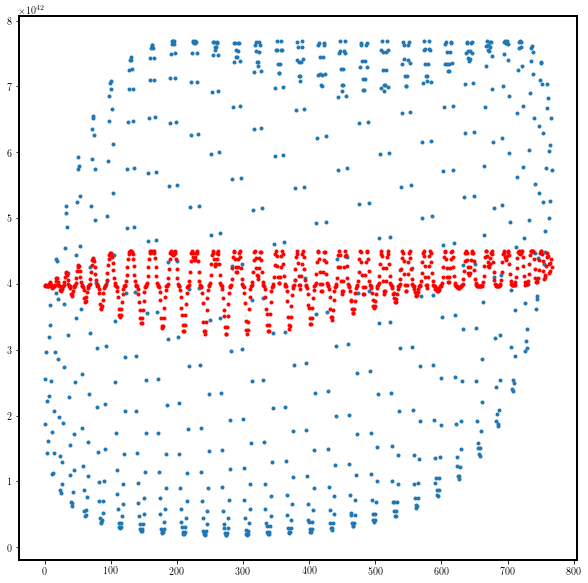

In [5]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
RD_wimp = loadtxt('../code/RD_wimp_costh.dat')
plt.plot(RD_wimp,'.')
RD_wimp = loadtxt('../code/RD_wimp_th.dat')
plt.plot(RD_wimp,'r.')
plt.show()

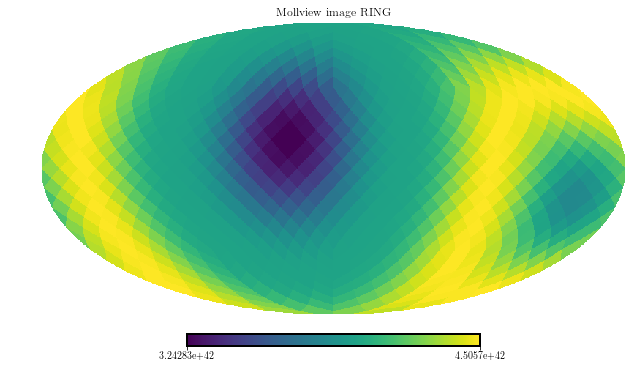

In [10]:
import healpy as hp
RD_wimp = loadtxt('../code/RD_wimp_costh.dat')
hp.mollview(RD_wimp, title="Mollview image RING")
plt.show()

In [7]:
m

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18